#Práctico 4 - Técnicas de clasificación con SKLearn

Dados los siguientes dataset utilizados en los prácticos 2.a y 2.b:

Palmer Penguins Dataset (OpenML id 43347 : https://www.openml.org/d/43347/)

Spam en mensajes de texto (adjunto, versión en jsons)


Resolver para cada dataset los siguiente puntos:


a) Definir cuál es el objetivo de aplicar técnicas de clasificación.

b) En caso de ser necesario, definir qué pre‐procesamiento se realizará a los datos. Justificar.

d) Obtener dos clasificadores utilizando la librería Scikit learn. Para ello elegir 2 técnicas de clasificación, configurar los clasificadores, y ejecutar los algoritmos. Justificar las decisiones tomadas.

e) Evaluar los dos clasificadores y compararlos, indicando cual de los dos recomendaría.

f) Explicar un ejemplo de cómo los clasificadores obtenidos pueden ser usados en el futuro en una aplicación real.

NOTA: LAS RESPUESTAS SE ENCUENTRAN DISTRIBUIDAS EN EL CÓDIGO DEPENDIENDO DE A QUÉ ESTÁN ASOCIADAS

a) El objetivo de aplicar técnicas de clasificación es poder predecir a cuál o cuáles clases se corresponde una nueva entrada de datos en un problema dado (en un caso de un problema multiclase pueden ser varias), a partir del aprendizaje de un dataset de entradas etiquetadas para el mismo problema (en otras palabras con su clase real definida, o sea el ground truth). De este modo, se pueden utilizar una gran variedad de técnicas, como algoritmos estáticos sin adaptación a nuevos ejemplos, otros que sí lo hacen o aprendizaje profundo a través de redes neuronales.

Puntualmente en este caso el problema claramente es de clasificación ya que el objetivo será poder predecir la especie de los pingüinos, que será la clase objetivo o también llamada target del problema en cuestión. Esto es fundamental si por ejemplo una organización protectora de animales recibe ciertas fotos de pingüinos en peligro de extinción para tomar una decisión frente a ellos, pero para lo cual necesita saber si se trata de un macho o una hembra porque por algún motivo proceden primero con un tipo de pingüino.

ALUMNO: Martino Ferrero

# **Instalación de ydata-profiling para el análisis**

In [ ]:
! pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=8d11a52d249820757bfeb7c54080891ff6892bfb21541cf0c42069991377c2c0
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


# **Descargar el dataset de pingüinos**

In [ ]:
from sklearn.datasets import fetch_openml

# Lee el dataset desde OpenMl utilizando la funcionalidad de SKLearn
penguins_dataset = fetch_openml(data_id=43347, as_frame=True)
print(penguins_dataset.data)
print(penguins_dataset.target) # imprime None porque no hay un target definido por defecto para este dataset

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  
0         3750.0    male

**Obtener datos del dataset**
Se ontienen los datos del dataset, en este caso indicando puntualmente como target o clase la columna de 'species' (especie de los pingüinos).

In [ ]:
penguins_dataset_df = penguins_dataset.frame
penguins_dataset_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


# Análisis exploratorio de datos

In [ ]:
penguins_dataset_df.describe() # se obtiene un reporte descriptivo de los datos con algunas estadísticas

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Visualizar el conjunto de datos**

Se obtienen una serie de gráficos que indican las distribuciones de los datos respecto al target (o sea la especie) para así poder sacar conclusiones. Se puede concluir que los pinguinos Gentoo del dataset tienden a tener una mayor masa, longitud de aleta y longitud de pico que los de las especies Adelie y Chinstrap (que en general suelen ser bastante parejos en cuanto a estas variables), mientras que estos suelen tener un pico más profundo.

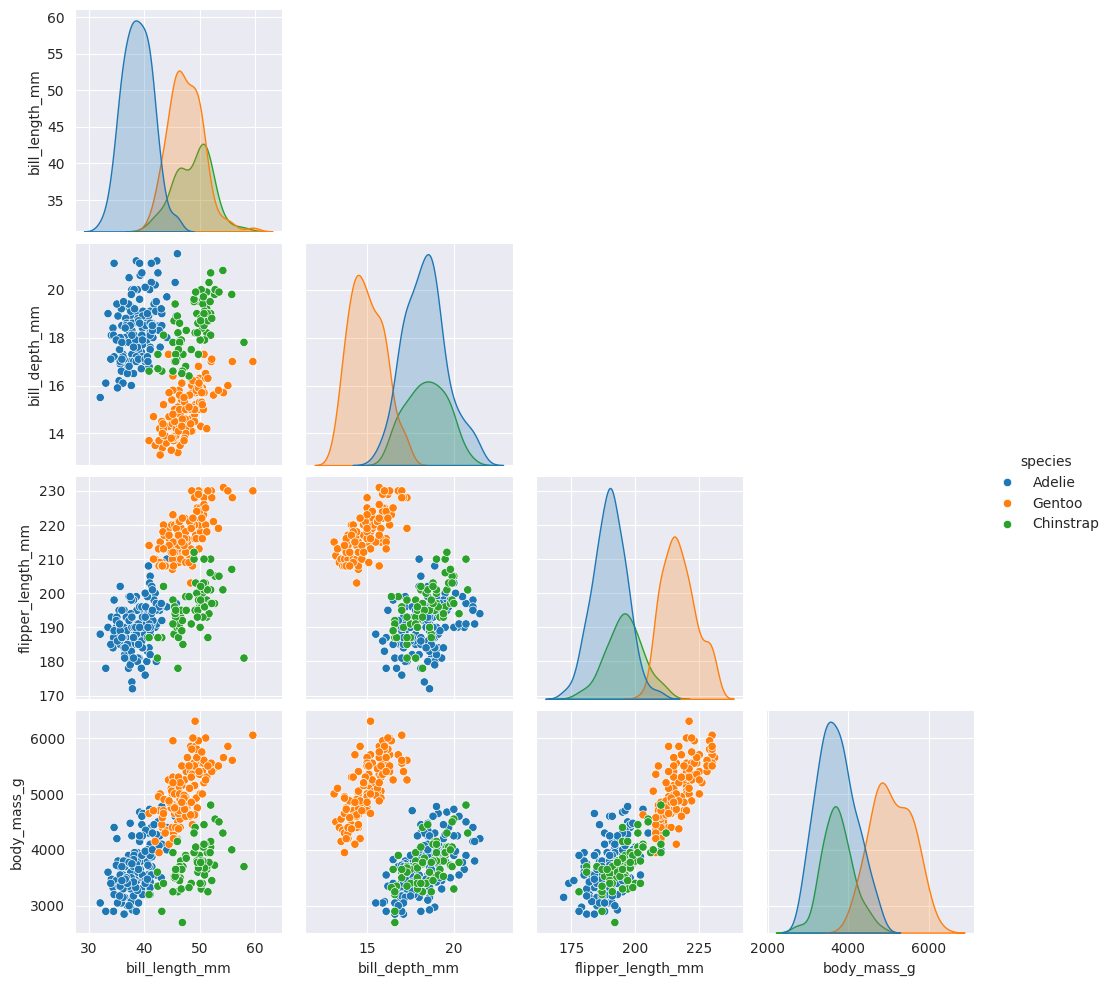

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

iris_plot = sns.pairplot(penguins_dataset_df, hue="species")
iris_plot.map_upper(hide_current_axis)
plt.show()

**Informe del conjunto de datos**

Se lleva a cabo un análisis de los datos mediante un YData Profiling Report, pudiendo ver que hay ciertas entradas del dataset con valores faltantes para las siguientes features:

-bill_length_mm: 2 faltantes

-bill_depth_mm: 2 faltantes

-flipper_length_mm: 2 faltantes

-body_mass_g: 2 faltantes

-sex: 11 faltantes

También se puede ver que hay una clara correlación positiva entre algunas features, por ejemplo entre el flipper_length_mm (longitud de la aleta en mm) y el body_mass_g (peso del cuerpo en gramos). Esto indica que, a medida que crece la longitud de la aleta del pinguino, su peso tiende a ser mayor. Esto mismo se confirma a través de los gráficos del análisis anterior, donde particularmente el gráfico que representa el body_mass_g en función del flipper_length_mm, evidencia que al pararse en un cierto peso en gramos para los pinguinos, se observará que en general la longitud de las aletas de aquellos que pesen eso o más tiende a ser mayor a la de los que pesan menos.

Por otra parte, se puede ver que el bill_depth_mm (profundidad del pico en mm) posee una correlación negativa con todas las otras variables cuantitativas, con menor medida respecto al bill_length_mm (longitud del pico en mm), de manera más notoria en cuanto al body_mass_g y finalmente más respecto al flipper_length_mm. Esto sin duda lleva a la conclusión de que a medida que el pico de los pinguinos es más profundo, suelen tener un pico con longitud más corta, menor peso y aletas con longitud más corta.

Además, se puede ver que claramente hay algunas features sin correlación entre sí, por ejemplo la isla y el sexo, donde es de 0. Esto indica que no influye en nada saber si un pinguino está en Biscoe, Dream o Torgensen para determinar qué tan probable es que sea macho o hembra. El sexo y la especie también poseen una correlación nula.

Otro análisis interesante evidenciado a partir del ProfileReport es que hay una mayor cantidad de pingüinos Adelie (152), después le sigue Gentoo (124), y por último se encuentra la especie Chinstrap (68).

Algo no menor es que no hay ninguna entrada del dataset sin valor en el campo asociado a la especie, por lo que no hay que preocuparse al respecto de eso (si los hubiera lo ideal sería no tener en cuenta esas entradas ya que es necesario el target de todas las entradas usadas para el entrenamiento).


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(penguins_dataset_df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 29.36it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Análisis específico de la correlación entre sexo y features numéricas**

Dado que el sexo era una de las variables que presentaba correlación positiva con todas las features cuantitativas (con algunas más que con otras), se procedió a hacer un análisis más puntual respecto a esta variable. Es evidente que en general los machos suelen tener una mayor longitud y profundidad de pico, así como tambén longitud de aletas y peso. Además, los valores más altos que sesgan ascendentemente estas variables, suelen estar asociados a los machos. Algo similar ocurre, aunque no tan bruscamente, respecto a los valores más bajos, que sesgan descendentemente, y en general están asociados a las hembras.

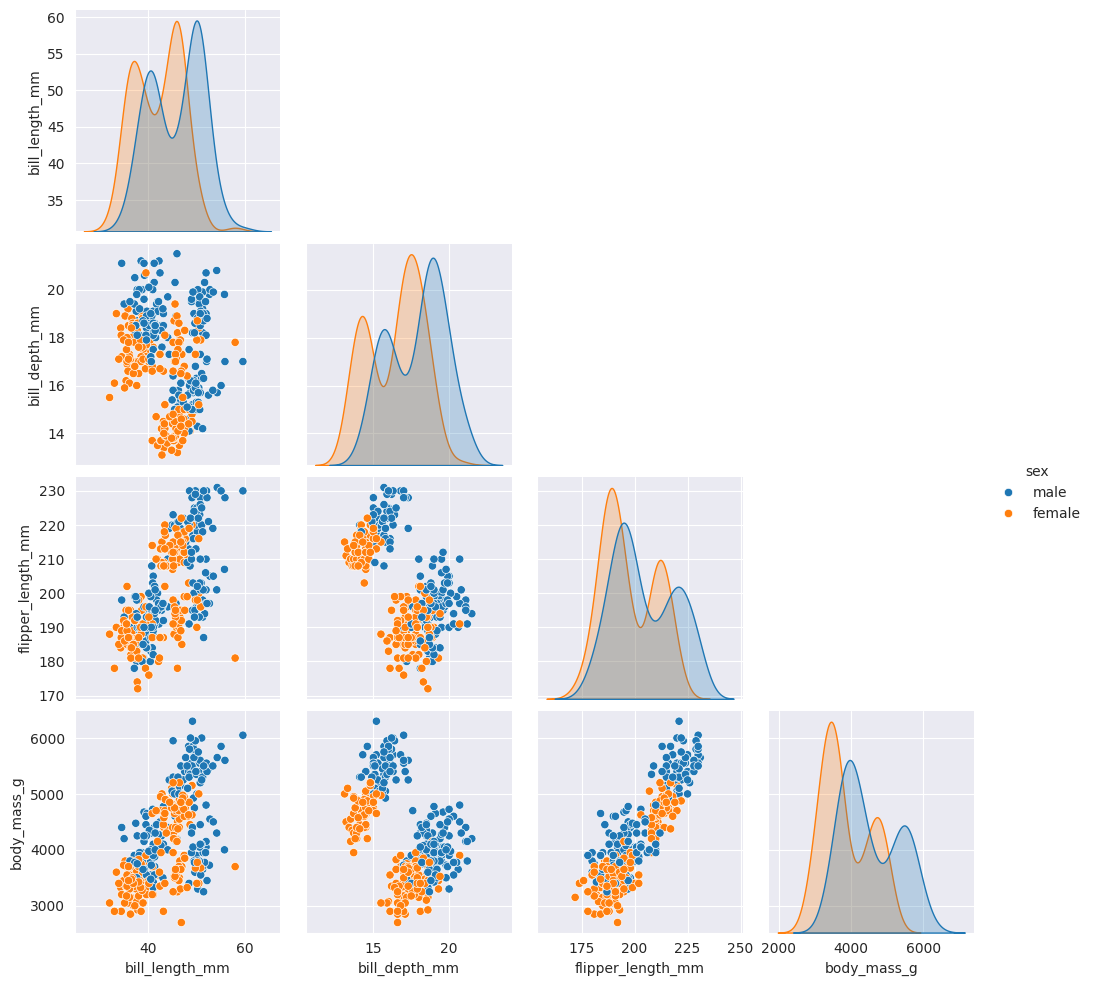

In [ ]:
iris_plot = sns.pairplot(penguins_dataset_df, hue="sex") # se analiza puntualmente la distribución del sexo para las variables numéricas que presentan correlación positiva con esta
iris_plot.map_upper(hide_current_axis)
plt.show()

# Tareas de preprocesamiento, entrenamiento, predicción y evaluación

b)

- Como primer paso, se eliminan aquellas filas que tienen demasiados valores faltantes (se estableció puntualmente 3 o más), con el objetivo de evitar tener entradas con tanta información no respaldada, ya que no es bueno ni confiable inferir mucha información para una misma entrada. Dado que ya se contaba con la información de que de otras columnas no hay datos faltantes, no se hizo nada respecto a las mismas (si hubiera faltantes para la especie se descartarían sí o sí porque no se puede entranar sin el ground truth, pero en este caso se sabía que esto no pasaba por el análisis previo).
- Luego, una vez separado el dataset en entrenamiento y testing, se codifican las etiquetas de clase a fin de llevarlas a valores numéricos que suelen ser preferibles para los algoritmos de aprendizaje.
- Más adelante, durante el pipeline se aplican las técnicas de llenado de los campos faltantes de las columnas numéricas por medio de las medias asociadas, y luego una normalización del tipo min-max. De esta manera se rellenan campos con datos faltantes y se llevan todos a una misma escala entre 0 y 1.
- Posteriormente los valores faltantes de la columna de sexo se completan con la moda para poder asignarles algún valor (y lógicamente la moda es el más probable). Se podría haber utilizado por ejemplo un algoritmo de clasificación para predecir las columnas de sexo faltantes a partir de las variables numéricas con las cuales como ya se indicó presenta una gran correlación (al no ser ninguna el target sería válido). Pero esto quizá no tendría tanto sentido ya que en sí esa predicción sería completamente dependiente de esas variables numéricas por lo que tampoco es que estaría aportando información nueva, sería rendundancia. Y además esto no se justificaría para tan pocas entradas con este campo faltante, además que el sexo en sí es una feature con una correlación nula con la especie, por lo que sería introducir mayor complejidad y redundancia sin sentido. Entonces resulta más conveniente nod escartas estas entradas por los datos que sí aportan, pero el sexo sencillamente completarlo con la moda (tal vez tampoco aporta mucho porque la cantidad de cada sexo es muy pareja y son bastantes entradas, pero tampoco afecta por la falta de correlación ya mencionada). Retomando el preprocesamiento, una vez hecho esto se le aplica una codificación binaria de ceros y unos a la columna de sexo para aprovechar la particularidad de que solo tiene 2 valores. Esto permite tener esta columna representada numéricamente y además menos columnas que si se separara en una de machos y otra de hembras.
- Se aplica una codificación one hot a la isla para poder llevarla a valores numéricos sin confundir al algoritmo con escalas. Al aplicar esto, la columna original se divide en 3, una por cada posible isla.
- Para el caso de los entrenamientos simples se divide en features de entrenamiento y de testing, y target de entrenamiento y de testing. De esta manera, se entrena el modelo con el 80% de los datos y se testea con el restante 20% (no hay validación). Aparte se hace una estratificación del dataset en base a la especie, lo que quiere decir que este particionado se hace balanceando las clases de tal manera que tanto en el entrenamiento como en la validación sean lo más similares posibles a la distribución real, lo que a su vez permite que los resultados sean más realistas.

d) Se eligirán los clasificadores de decision tree (árbol de decisión) y de k-NN (k-Nearest Neighbors o vecinos más cercanos). La principal razón de estas elecciones es que el decision tree es bastante sencillo y en este caso no requiere de muchas dimensiones de información, aunque tenga el punto negativo de que puede caer en overfitting. Además, se le colocó un random state 42 para establecer una semilla aleatoria que garantice la reproducibilidad del entrenamiento y predicción. Por otra parte, también se optó por kNN por ser sencillo y efectivo en muchos casos. Incluso teniendo en cuenta que es sensible a ruido y outliers.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

def missing_values_removal(df): # se eliminan todas las filas del dataset con 3 o más campos nulos porque no aportan información
  x = df.copy()
  x = x[x.isna().sum(axis=1) < 3]
  x.reset_index(drop=True, inplace=True) # se reajustan los índices para que queden todos con valores consecutivos tras la eliminación de las filas que correspondan
  return x

def get_features_and_target(dataset):

  # -------------------------------- PREPROCESAMIENTO GENERICO SOBRE EL DATASET --------------------------------

  preprocessed_df = missing_values_removal(dataset)

  # -------------------------------- SEPARACIÓN EN FEATURES Y TARGET --------------------------------

  X = preprocessed_df.drop(columns='species') # features
  y = preprocessed_df['species'] # target

  # -------------------------------- TRANSFORMACIONES SOBRE TARGET --------------------------------

  label_encoder_target = LabelEncoder()
  y = label_encoder_target.fit_transform(y) # se codifican las clases del target

  return X, y, label_encoder_target.classes_

def get_pipeline(model):

  # -------------------------------- TRANSFORMACIONES SOBRE FEATURES DEL SUBSET DE ENTRENAMIENTO --------------------------------

  pipeline_numerical_features = Pipeline([('mean_imputer', SimpleImputer(strategy='mean')),
                                        ('min_max_scaler', MinMaxScaler())])

  pipeline_sex_feature = Pipeline([('most_frequent_imputer', SimpleImputer(strategy='most_frequent')),
                                  ('ordinal_encoder', OrdinalEncoder())])

  pipeline_island_feature = Pipeline([('one_hot_encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])


  features_preprocessor = ColumnTransformer([
      ('numerical', pipeline_numerical_features, ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']),
      ('categorical_sex', pipeline_sex_feature, ['sex']),
      ('categorical_island', pipeline_island_feature, ['island'])], remainder="passthrough")

  # -------------------------------- PIPELINE GENERAL DE PREPROCESAMIENTO Y ENTRENAMIENTO --------------------------------

  return Pipeline([
    ('main_preprocessor', features_preprocessor),
    ('classifier', model)])

  # -------------------------------- ENTRENAMIENTO Y PREDICCIÓN SIMPLE --------------------------------

def simple_training_and_prediction(model):
  X, y, classes = get_features_and_target(penguins_dataset_df)
  general_pipeline = get_pipeline(model)
  # se utilizará el 80% de los datos para entrenamiento y el 20% para testing
  # se usa una semilla aleatoria para garantizar que los resultados sean reproducibles
  # se estratifican los datos de tal manera que se mantenga la misma distribución de las especies en el conjunto de entrenamiento y en el de validación, para que sea más real
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  general_pipeline.fit(X_train, y_train)
  y_pred = general_pipeline.predict(X_test)
  return y_test, y_pred, classes

  # -------------------------------- EVALUACIÓN --------------------------------

def evaluate_model(y_test, y_pred, classes):
  print("Classification report:\n", classification_report(y_test, y_pred, target_names=classes)) # reporte de métricas clásicas
  print("Confusion matrix:")
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize=None, display_labels=classes, cmap=plt.cm.Blues) # matriz de confusión de las predicciones para conocer los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos de la predicción

  # -------------------------------- CROSS VALIDATION CON MÚLTIPLES MÉTRICAS DE RESULTADO --------------------------------

def cross_validation_and_scores(model, n_folds=10):
  X, y, classes = get_features_and_target(penguins_dataset_df)
  general_pipeline = get_pipeline(model)
  scoring = ['recall_macro', 'f1_macro', 'precision_macro']
  scores = cross_validate(general_pipeline, X, y, scoring=scoring, cv=n_folds) # en este caso, al ser cross validation, se evalúa el rendimiento que tendría el modelo entrenado con todos los datos promediando los resultados de cada fold
  print('Recall macro promedio: ', scores['test_recall_macro'].mean())
  print('F1 macro promedio: ', scores['test_f1_macro'].mean())
  print('Precision macro promedio: ', scores['test_precision_macro'].mean())


e)

Es evidente que al evaluar los dos clasificadores obtenidos a partir de la técnica de particionado del dataset original en training y testing, ambos lograron buenos resultados. Esto probablemente ocurre porque la cantidad de entradas logra representar bien el problema de clasificación. Sin embargo, se notan los siguientes aspectos:

- El algoritmo de Decision Tree tuvo resultados casi perfectos, acertando todo a excepción de un falso negativo para la especie Adelie en la que predijo Chinstrap (lo cual también puede verse como un falso positivo para Chinstrap). Esto explica que las únicas métricas que no llegan a 1 son la precisión de Chinstrap y el recall de Adelie. La precisión de Adelie sí da 1 ya que no hubo ninguna predicción de Adelie que realmente no lo fuera, pero su recall baja porque una de las entradas que tuvo que ser predicha como Adelie no lo fue. Por su lado, la precisión de Chinstrap no da 1 porque una de las entradas que se clasificaron como esa clase, no lo era realmente, pero el recall es 1 puesto que de todas las entradas que sí tenían que ser predichas como Chinstrap así lo fueron. Lógicamente, al haber más ejemplares de Adelie que de Chinstrap en el entrenamiento, el error es menor en el recall de Adelie (error de 0.03) que en la precisión de Chinstrap (error de 0.07). El F1-score baja en ambos casos dado que combina precisión y recall, siendo la media armónica de ambos (obviamente baja más en el caso de Chinstrap por el mismo motivo). Estos resultados tan altos hacen a la idea de que el decision tree puede haber entrado en overfitting, al cual es bastante propenso.

- El algoritmo de k-NN tuvo predicciones perfectas en este caso, acertando todo. Esto podría indicar un posible overfitting (más allá de que este algoritmo no posee un entrenamiento en el sentido tradicional), ya que el k no es muy alto. Sin embargo esto es poco probable ya que las clases estaban balanceadas de acuerdo a la distribución original y tampoco parecía haber muchos outliers. Si llegara a haber outliers futuros podría traer problemas, pero eso no sería por overfitting, ya que es un algoritmo que por su naturaleza es sensible a estos. En cuanto a las métricas, tanto la precision, recall, F1-score y support dieron valores de 1 ya que las predicciones fueron perfectas.

Considerando que ambos algoritmos llegaron a métricas demasiado altas, no hay tantas inclinaciones por los resultados. Sin embargo, si hay que elegir a uno probablemente sería el k-NN ya que el decision tree es mucho más probable que por los resultados tan perfectos haya caído en overfitting (el otro no erró nada pero no es tan propenso a este problema).

También se hizo un análisis extra con la técnica de cross validation, usando todo el dataset para entrenamiento y testing a partir de la división en 10 folds (donde en cada uno se testea con ciertos datos y se entrena con todos los otros). Al aplicar esta técnica se pudo ver que no estuvieron considerablemente lejos los valores de precisión, recall y F1 macro promedio respecto a los que se obtendrían promediando los anteriores para el entrenamiento con splitting. Esto da cuenta que los resultados parecieran ser bastante realistas. Algo que sí se puede ver en el entrenamiento con cross validation es que pareciera ser mejor el k-NN que el decision tree porque los valores de las medias de las métricas se mantuvieron muy similares al 1, mientras que en el otro caso estuvieron bastante bajas.

Por todos estos motivos, considero que sería preferible elegir el k-NN, que además tiene la ventaja de que su construcción no es tan costosa y en este caso tampoco su predicción por no haber tantas entradas en el dataset.

Classification report:
               precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        30
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

Confusion matrix:


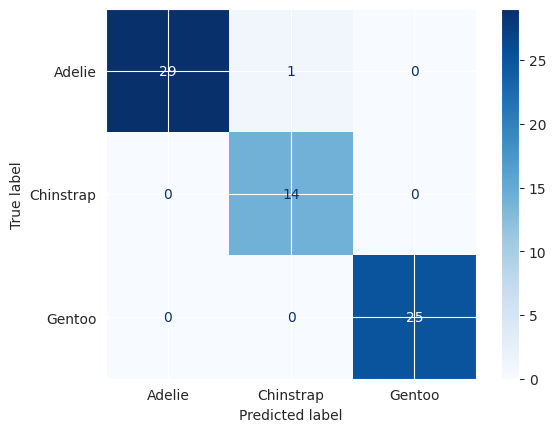

In [ ]:
from sklearn.tree import DecisionTreeClassifier

ground_truth_y, predicted_y, y_classes = simple_training_and_prediction(DecisionTreeClassifier(random_state=42))
evaluate_model(ground_truth_y, predicted_y, y_classes)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cross_validation_and_scores(DecisionTreeClassifier(random_state=42))

Recall macro promedio:  0.9618253968253969
F1 macro promedio:  0.9580858222492526
Precision macro promedio:  0.9605116833058011


Classification report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

Confusion matrix:


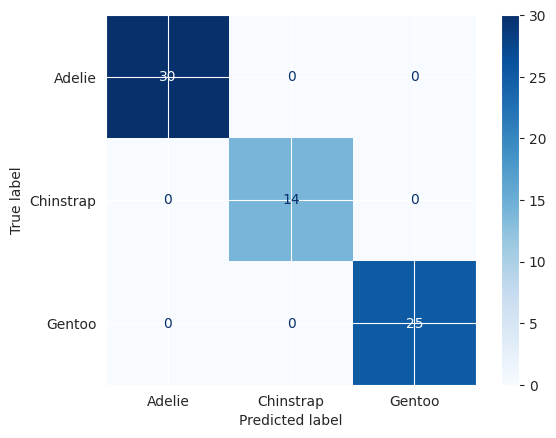

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

ground_truth_y, predicted_y, y_classes = simple_training_and_prediction(KNeighborsClassifier(n_neighbors=5))
evaluate_model(ground_truth_y, predicted_y, y_classes)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

cross_validation_and_scores(KNeighborsClassifier(n_neighbors=5))

Recall macro promedio:  0.9907936507936508
F1 macro promedio:  0.9892754532576558
Precision macro promedio:  0.9889880952380953


f) Estos clasificadores pueden ser utilizados en el futuro en una aplicación real donde se permita cargar los datos del pingüino que se está analizando pero cuya especie se desconoce, y automáticamente al querer llevar a cabo la predicción se haga una solicitud a una API que se encuentre corriéndolo y que responde con la clase predicha. También podría usarse en conjunto con otro modelo que prediga valores asociados a las features de un pingüino por ejemplo a partir de una foto, y que luego estos se usen para la predicción de la especie con este modelo. Sin embargo en este caso quizá es un poco complejo el primer paso sobre todo para las features numéricas que son muy difíciles de predecir correctamente a partir de un modelo (que tendría que ser de regresión lineal para el caso de ese segundo modelo).